# Detecting the Attacks in Network Packets
In this task,  **Intrusion Detection system** will be created and designed using Support Vector Machine (SVM) algorithm:<br>

# Support Vector Machine (SVM) for Attacks Classification

## Problem Statment

With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy. <br> Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.<br>
in this task a moel will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.
![<Spam Classifier>](Attacks_detection.png)


# Importing the libraries

In [112]:
# importing the libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing


# NSL-KDD dataset Explore
Explination:-
1- idea what and how its collected
2- number of features
3- Link refference to the dataset
4- labels types

In [3]:
#loading the dataset NSL-KDD dataset 
train_df = "NSL_KDD_Train.csv"
test_df = "NSL_KDD_Test.csv"


In [4]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [5]:
Training_set = pd.read_csv(train_df,header=None, names = col_names)
Test_set = pd.read_csv(test_df, header=None, names = col_names)
test_sample=pd.read_csv(Test_sample, header=None, names = col_names)
length_Training=len(Training_set)
length_testing=len(Test_set)
print('Dimensions of the Training set:',Training_set.shape)
print('Dimensions of the Test set:',Test_set.shape)


Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


No handles with labels found to put in legend.


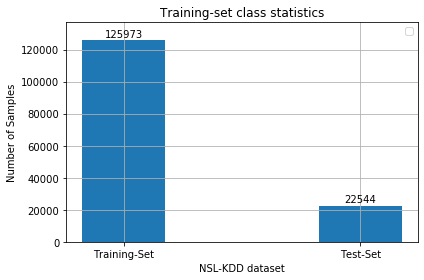

In [6]:

labels = ['Training-Set', 'Test-Set']
number_of_samples = [length_Training, length_testing]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(labels, number_of_samples, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('NSL-KDD dataset')
ax.set_ylabel('Number of Samples')
ax.set_title('Training-set class statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()
ax.set_ylim(0,137000)
plt.grid()
plt.savefig('Figure 1 statistics of the training and test dataset.pdf')
plt.show()

In [7]:
Training_set.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
test_sample.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
Training_Label = Training_set['label'].value_counts()
print('Label distribution Training set:')
print(Training_set['label'].value_counts())


Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


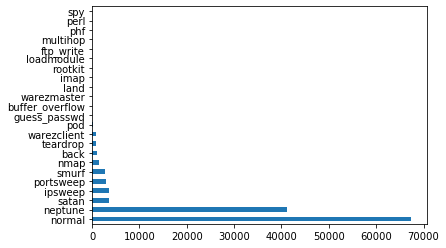

In [10]:
Training_set['label'].value_counts()[:23].plot(kind='barh')

In [11]:
Test_Label = Test_set['label'].value_counts()
print('Label distribution Test_set:')
print(Test_set['label'].value_counts())

Label distribution Test_set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
udpstorm              2
phf                   2
perl                  2
sqlattack             2
imap                  1
Name: label, dtype: int64


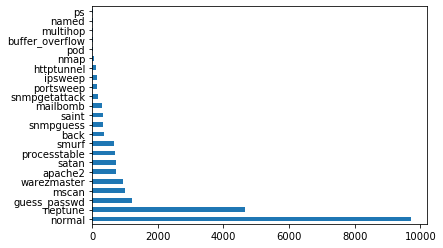

In [12]:
Test_set['label'].value_counts()[:23].plot(kind='barh')

# Over all Block diagram Steps 
the over all steps can be illustrated into 3 Parts as shown in the following Figure.<br>

![<Spam Classifier>](overall_parts.png).


# Part one Preprocessing Techniques
![<Spam Classifier>](part_one.png).<br>
Preprocessing Technique Part can be devided into four main steps as shown in the following Figure.<br>
![<Spam Classifier>](pre-processing.png).
1- **Integer Encoding**.<br>
For efficient implementation and get the best results from applied machine learning algorithm, the dataset need to be prepared well. SVM and other machine learning algorithms cannot deal with the categoral data, therefore the categoral features provided in NSL-KDD dataset need to be convereted to Neumerical features. The first step is to encode the categorcal data into integer represenatation. The output will be a sparse matrix in which each column corresponds to a possible value. It is assumed that the input properties have values in the range [0, n_values]. <br> <br>.
![<Spam Classifier>](Integer_Encoding.png).
2- **Onehot-Encoding**.<br>
The second step is to convert the integer represenatation to Onehot-Encoding. Onehot-Encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. One-Hot-Encoding is used to convert all categorical properties to binary properties. One-Hot-Endcoding requirement.<br> <br>
![<Spam Classifier>](one-hot encoding.png).
3- **Feature scaling**.
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. **standard scaling** were applied on the dataset features It also helps in speeding up the calculations in an algorithm.<br> <br>
    $$ X_{scaled} = \frac{X_{original} - X_{mean}}{X_{standard Deviation}}$$<br> <br>
4- **Feature Selection**.
Feature Selection used to extract the important features from a very large-scale dataset. These techniques boost the learning process of the model in addition improve the accuracy and prevent the overfitting<br> <br>



# Step_One integer Encoding
in this step you will implement two functions **categorical_column** and **Label_integer** 


## categorical_column function
implement categorical_column function that finds the categorical feature columns in the training set and test.<br><br>
**Input**<br>
1-Training-set<br> 
2-Test-set.<br><br>
**Output**<br>
1-Feature columns that have non-numerical values.<br>
2-The number of unique categories in each Feature column.<br><br>
**Hint** <br>
1-Find the non-neumirical features using this pandas method [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) <br>
2-Use Unique method in pandas framework [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [151]:
def categorical_column(input_set):
    cat_col_name=[]
    cat_length=[]
    for col_name in input_set.columns:
        if input_set[col_name].dtypes == 'object' :
            unique_cat = len(input_set[col_name].unique())
            cat_col_name.append(col_name)
            cat_length.append(unique_cat)
    #         print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    return (cat_col_name,cat_length)

In [152]:
Cat_Training_set,length_train=categorical_column(Training_set)
print("Training Set")
for i in range (len(Cat_Training_set)):
    print("Feature" ,Cat_Training_set[i] , "has" ,length_train[i],"categories")
print('______________________________________________________________________________________________________________')
print('Distribution of non-numerical values in each Feature for the Training set')
for i in range (len(Cat_Training_set)):
    print("Distribution of" , Cat_Training_set[i])
    print(Training_set[Cat_Training_set[i]].value_counts().sort_values(ascending=False).head())
    print('___________________________________')


Training Set
Feature protocol_type has 3 categories
Feature service has 70 categories
Feature flag has 11 categories
Feature label has 23 categories
______________________________________________________________________________________________________________
Distribution of non-numerical values in each Feature for the Training set
Distribution of protocol_type
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
___________________________________
Distribution of service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64
___________________________________
Distribution of flag
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64
___________________________________
Distribution of label
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: label, dtype: int64
___________________________________


In [153]:
Cat_Test_set,length_test=categorical_column(Test_set)
print("Test Set")
for i in range (len(Cat_Test_set)):
    print("Feature" ,Cat_Test_set[i] , "has" ,length_test[i],"categories")
print('______________________________________________________________________________________________________________')
print('Distribution of non-numerical values in each Feature for the Test set')
for i in range (len(Cat_Test_set)):
    print("Distribution of" , Cat_Test_set[i])
    print(Training_set[Cat_Test_set[i]].value_counts().sort_values(ascending=False).head())
    print('___________________________________')


Test Set
Feature protocol_type has 3 categories
Feature service has 64 categories
Feature flag has 11 categories
Feature label has 38 categories
______________________________________________________________________________________________________________
Distribution of non-numerical values in each Feature for the Test set
Distribution of protocol_type
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
___________________________________
Distribution of service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64
___________________________________
Distribution of flag
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64
___________________________________
Distribution of label
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: label, dtype: int64
___________________________________


In [154]:
Training_set_labels=Training_set['label']
Test_set_labels=Test_set['label']
print(Training_set_labels.head(5))
print(Test_set_labels.head(5))


0     normal
1     normal
2    neptune
3     normal
4     normal
Name: label, dtype: object
0    neptune
1    neptune
2     normal
3      saint
4      mscan
Name: label, dtype: object


In [155]:
categorical_columns=['protocol_type', 'service', 'flag']

Training_categorical_values = Training_set[categorical_columns]
Test_categorical_values = Test_set[categorical_columns]

Training_categorical_values.head()



,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


## Label_integer function
implement Label_integer function that convert the categorical values into integer values using LabelEncoder from scikit-learn  .<br><br>
![<Spam Classifier>](Label_encoder.png).
**Input**<br>
1-dataset<br><br>
**Output**<br>
1-the Encoded values in the dataset .<br><br>
**Hint** <br>
1-LabelEncoder  [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)<br>

In [156]:
def Label_integer(dataset_categorical_values):
    data_categorical_values_enc=dataset_categorical_values.apply(LabelEncoder().fit_transform)
    print(dataset_categorical_values.head())
    print('--------------------')
    print(data_categorical_values_enc.head())
    return (data_categorical_values_enc)

In [157]:
print('training_set_encoded')
Training_categorical_values_enc=Label_integer(Training_categorical_values)
print("_______________________________________________________________________")
print('test_set_encoded')

Test_categorical_values_enc=Label_integer(Test_categorical_values)

training_set_encoded
  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
_______________________________________________________________________
test_set_encoded
  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO
--------------------
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


# Step_Two  Onehot Encoding 

in this step you will implement the two functions **concatenate** and  **Onehot-Encoding** in order to convert the categrical features into one hot encoding for training set and test.<br>



## concatenate Function
in this function you will concatenate each feature column with its category as shown in the following Figure an example of protocol type feature and its category:- <br> 
![<Spam Classifier>](onehot_concat.png).
**Input**<br>
1-Categrical features for dataset<br> 
2-Original input dataset<br><br>
**Output**<br>
1-Onehot encoding vector for the Training-set.<br>
2-Onehot encoding vector for the Test-set.<br><br>
**Hint** <br>

1-concatenate two (strings, lists) together [Link](https://www.w3schools.com/python/gloss_python_join_lists.asp) <br>


In [158]:
def concatenate (cat_feature_columns,dataset):
    dumcols=[]
    for i in range (len(cat_feature_columns)):
        unique_protocol=sorted(dataset[cat_feature_columns[i]].unique())
        string1=cat_feature_columns[i]+"_"
        unique_col2=[string1 + x for x in unique_protocol]
        dumcols.extend(unique_col2)
    return (dumcols)

In [159]:
concatenated_Training_set=concatenate(categorical_columns,Training_set)
concatenated_Test_set=concatenate(categorical_columns,Test_set)

In [160]:
print('concatenated features for the Training set')
print(concatenated_Training_set)
print('__________________________________________________________________________________________________________________')
print('concatenated features for the Test set')
print(concatenated_Test_set)

concatenated features for the Training set
['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', '

## OneHot_Encoder Function
in this function you will convert the whole features that had been **concatenated** as well as **Encoded** into onehot-Encoding vector using OneHotEncoder methods from scikit-learn <br> 

**Input**<br>
1-Categrical features for dataset<br> 
2-Encoded vectors<br><br>
**Output**<br>
1-Onehot encoding vector for the dataset.<br><br>

**Hint** <br>
1-OneHotEncoder [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)<br>
2-use the catrgories type to be **Auto** to determine categories automatically from the training data.

In [161]:
def OneHot_Encoder(categrical_feature ,Encoded_vectors):
    enc = OneHotEncoder(categories='auto')
    data_set_categorical_values_encenc = enc.fit_transform(categrical_feature)
    data_cat_data = pd.DataFrame(data_set_categorical_values_encenc.toarray(),columns=Encoded_vectors)
    data_cat_data.head()
    return (data_cat_data)

In [162]:
Training_cat_data=OneHot_Encoder(Training_categorical_values_enc,concatenated_Training_set)
Training_cat_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [163]:
Test_cat_data=OneHot_Encoder(Test_categorical_values_enc,concatenated_Test_set)
Test_cat_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
trainservice=Training_set['service'].tolist()
testservice= Test_set['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_http_8001',
 'service_harvest',
 'service_aol',
 'service_red_i',
 'service_urh_i']

In [165]:
for col in difference:
    Test_cat_data[col] = 0

print(Training_cat_data.shape)
print(Test_cat_data.shape)

(125973, 84)
(22544, 84)


## Migrate
in this step the generated onehot-Encoding vector for the categrical data will be migrated with the original data as follows:- <br> 

**1-Add the generated onehot-Encoding vector with the original dataset**<br>
**2-Drop the old categrical features**<br>


In [168]:
def Migrate(dataset,dataset_cat_data):
    new_dataset=dataset.join(dataset_cat_data)
    new_dataset.drop('flag', axis=1, inplace=True)
    new_dataset.drop('protocol_type', axis=1, inplace=True)
    new_dataset.drop('service', axis=1, inplace=True)
    return (new_dataset)

In [169]:
new_training=Migrate(Training_set,Training_cat_data)
new_training.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
new_test=Migrate(Test_set,Test_cat_data)
new_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_http_2784,service_http_8001,service_harvest,service_aol,service_red_i,service_urh_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [171]:
print(new_training.shape)
print(new_test.shape)

(125973, 123)
(22544, 123)


## Encoding the labels
in this step the labels will be Integer encodded and represented in binary values rather than Non-numerical data reresentation. <br>
The labels  represents the **Attack Type** thoose labels can be calssified into Five main categories:-<br>
1-**Normal**<br>
2-**DoS**<br>
3-**Probe** <br>
4-**R2L** <br>
5-**U2R**<br>
The dataset was divided into separate datasets for each attack category. Attack tags have been renamed for each.<br>
1-**Normal** Represented as **0**<br>
2-**DoS**    Represented as **1**<br>
3-**Probe**  Represented as **2**<br>
4-**R2L**    Represented as **3**<br>
5-**U2R**    Represented as **4** <br>
In the new datasets, the tag column has been replaced with the new values.

In [172]:
label_Train=new_training['label']
label_Test=new_test['label']
# change the label column
label_Train=label_Train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
label_Test=label_Test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
new_training['label'] = label_Train
new_test['label'] = label_Test

In [173]:
new_training

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [176]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

# Filter all rows with label value except itself
# isin filter function

DoS_df=new_training[new_training['label'].isin(to_drop_DoS)];
Probe_df=new_training[new_training['label'].isin(to_drop_Probe)];
R2L_df=new_training[new_training['label'].isin(to_drop_R2L)];
U2R_df=new_training[new_training['label'].isin(to_drop_U2R)];



#test
DoS_df_test=new_test[new_test['label'].isin(to_drop_DoS)];
Probe_df_test=new_test[new_test['label'].isin(to_drop_Probe)];
R2L_df_test=new_test[new_test['label'].isin(to_drop_R2L)];
U2R_df_test=new_test[new_test['label'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


No handles with labels found to put in legend.


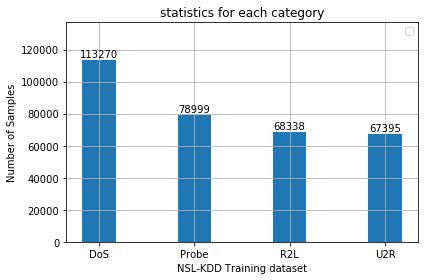

In [178]:

labels = ['DoS', 'Probe','R2L','U2R',]
number_of_samples = [len(DoS_df), len(Probe_df),len(R2L_df),len(U2R_df)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(labels, number_of_samples, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('NSL-KDD Training dataset')
ax.set_ylabel('Number of Samples')
ax.set_title('statistics for each category in the Training-set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()
ax.set_ylim(0,137000)
plt.grid()
# plt.savefig('Figure 1 statistics of the training and test dataset.pdf')
plt.show()

No handles with labels found to put in legend.


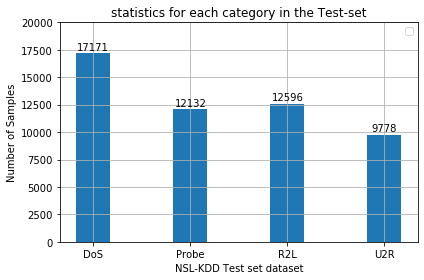

In [181]:

labels = ['DoS', 'Probe','R2L','U2R',]
number_of_samples = [len(DoS_df_test), len(Probe_df_test),len(R2L_df_test),len(U2R_df_test)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(labels, number_of_samples, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('NSL-KDD Test set dataset')
ax.set_ylabel('Number of Samples')
ax.set_title('statistics for each category in the Test-set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()
ax.set_ylim(0,20000)
plt.grid()
# plt.savefig('Figure 1 statistics of the training and test dataset.pdf')
plt.show()

# Step_Three  Feature Scaling

In this step you will implement **Feature_Scaling** function to normalize the range of independent variables or features in the dataset.<br>
**standard scaling** were applied on the dataset features It also helps in speeding up the calculations in an algorithm.<br><br>
    $$ X_{scaled} = \frac{X_{original} - X_{mean}}{X_{standard Deviation}}$$<br> <br>

In [182]:
# Split dataframes into X & Y
# X Properties, Y result variables

X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label

# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label

X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label

X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

** Since the column names will be deleted at this stage, we save the column names for later use. **

## Feature_Scaling function

In this function you will implement the a normalization Technique named **standard scaling** using Scikit learn framework.<br>

**Input**<br>
1-The category for each attack type<br><br>
**Output**<br>
1-the Normalized vector .<br><br>

**Hint** <br>
1-use StandardScaler [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)<br>

In [184]:

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

# Step_Four  Feature Selection

**Feature Selection**.
1-Feature Selection used to extract the important features from a very large-scale dataset. These techniques boost the learning process of the model in addition improve the accuracy and prevent the overfitting<br>

2-you will implement **Feature_select** function that select the important features in each category in the using algorithm named **Recursive Feature Elimination(RFE)** with scikit-learn<br>

3-To implement RFE, a ML or statistical method need to be configured to score the selection of RFE, in our example we will choose **Random Forest (RF)**<br>

4-
**Input**<br>
1-The features for each category (X-label) for each category<br><br>
**Output**<br>
1-the best Features selected in each category.<br><br>

**Hint** <br>

1-Use Random Forest algorithm for scoring tech [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>
&emsp; **A**-The number of jobs =2,the number of jobs to run in parallel.<br>
&emsp; **B**-Number of estimator =10, The number of trees in the forest.<br>
1-Use Recursive Feature Elimination (RFE) [Link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)<br>
&emsp; **A**-The number of features to be selected=13.<br>
&emsp; **B**-Number of steps=1.<br>

In [186]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

In [187]:
rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [188]:
#Re-apply for the remaining categories 

In [189]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [190]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [191]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [192]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)


Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'count', 'srv_count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'service_ecr_i', 'flag_SF']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'service_http', 'service_private']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'is_guest_login', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'root_shell', 'num_file_creations', 'dst_host_count', 'dst_host_srv_count

In [193]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)


(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


# Part Two Algorithm Building

![<Spam Classifier>](Part_two.png).



## In this step Support Vector Machine will be trained and learned using the all 84 features in the dataset<br>
**1 The first step is to implement SVM on the data, identify your Kernel used... more details here** [Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) <br>

**2 The Second step is to Fit the model according to the given training data... more details here find the *Methods* section** [Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)<br>

**3 The Third step is to Predict class labels for samples in X... more details here find the *Methods* section** [Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)	

**4 Create Confusion_matrix for each type in the dataset... more details** [Link]( https://en.wikipedia.org/wiki/Confusion_matrix)	

## Step_One implement SVM

In [255]:
from sklearn.svm import SVC

clf_SVM_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_U2R=SVC(kernel='linear', C=1.0, random_state=0)



## Step_Two  Fit the model SVM

In [256]:
clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Step_Three  Predict class labels

In [257]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)
# Create confusion matrix for DoS 
confusion_DoS=pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print('Create confusion matrix for DoS') 
print(confusion_DoS)
print('-----------------------------------------------')
##_-----------------------------------------------------------------------------------------------_##
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Create confusion matrix for Probe 
confusion_Probe=pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print('Create confusion matrix for Probe') 
print(confusion_Probe)
print('-----------------------------------------------')
##_-----------------------------------------------------------------------------------------------_##
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Create confusion matrix for R2L
confusion_R2L=pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print('Create confusion matrix for R2L') 
print(confusion_R2L)
print('-----------------------------------------------')
##_-----------------------------------------------------------------------------------------------_##
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Create confusion matrix for U2R
confusion_U2R=pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print('Create confusion matrix for U2R') 
print(confusion_U2R)

Create confusion matrix for DoS
Predicted attacks     0     1
Actual attacks               
0                  9455   256
1                  1359  6101
-----------------------------------------------
Create confusion matrix for Probe
Predicted attacks     0     2
Actual attacks               
0                  9576   135
2                  1285  1136
-----------------------------------------------
Create confusion matrix for R2L
Predicted attacks     0    3
Actual attacks              
0                  9639   72
3                  2737  148
-----------------------------------------------
Create confusion matrix for U2R
Predicted attacks     0  4
Actual attacks            
0                  9710  1
4                    67  0


# Part Three Evaluation

![<Spam Classifier>](part_three.png).

## Evaluating the proposed model (SVM) using F-max, Accuary, Percision and Recall  <br>


**DoS**

In [261]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy_84_feature_DoS = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_84_feature_DoS.mean(), accuracy_84_feature_DoS.std() * 2))

precision_84_feature_DoS = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_84_feature_DoS.mean(), precision_84_feature_DoS.std() * 2))

recall_84_feature_DoS = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_84_feature_DoS.mean(), recall_84_feature_DoS.std() * 2))

f_84_feature_DoS = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_84_Feature: %0.5f (+/- %0.5f)" % (f_84_feature_DoS.mean(), f_84_feature_DoS.std() * 2))

Accuracy: 0.99371 (+/- 0.00375)
Precision: 0.99107 (+/- 0.00785)
Recall: 0.99450 (+/- 0.00388)
F-measure_84_Feature: 0.99278 (+/- 0.00428)


**Probe**

In [263]:
accuracy_84_feature_Probe = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_84_feature_Probe.mean(), accuracy_84_feature_Probe.std() * 2))

precision_84_feature_Probe = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_84_feature_Probe.mean(), precision_84_feature_Probe.std() * 2))

recall_84_feature_Probe = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_84_feature_Probe.mean(), recall_84_feature_Probe.std() * 2))

f_84_feature_Probe = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_84_feature_Probe: %0.5f (+/- %0.5f)" % (f_84_feature_Probe.mean(), f_84_feature_Probe.std() * 2))

Accuracy: 0.98450 (+/- 0.00525)
Precision: 0.96907 (+/- 0.01029)
Recall: 0.98365 (+/- 0.00686)
F-measure_84_feature_Probe: 0.97613 (+/- 0.00799)


**R2L**

In [264]:
accuracy_84_feature_R2L = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_84_feature_R2L.mean(), accuracy_84_feature_R2L.std() * 2))

precision_84_feature_R2L = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_84_feature_R2L.mean(), precision_84_feature_R2L.std() * 2))

recall_84_feature_R2L = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_84_feature_R2L.mean(), recall_84_feature_R2L.std() * 2))

f_84_feature_R2L = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_84_feature_R2L: %0.5f (+/- %0.5f)" % (f_84_feature_R2L.mean(), f_84_feature_R2L.std() * 2))

Accuracy: 0.96793 (+/- 0.00738)
Precision: 0.94854 (+/- 0.00992)
Recall: 0.96264 (+/- 0.01386)
F-measure_84_feature_R2L: 0.95529 (+/- 0.01046)


**U2R**

In [266]:
accuracy_84_feature_U2R = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_84_feature_U2R, accuracy_84_feature_U2R.std() * 2))

precision_84_feature_U2R = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_84_feature_U2R.mean(), precision_84_feature_U2R.std() * 2))

recall_84_feature_U2R = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_84_feature_U2R.mean(), recall_84_feature_U2R.std() * 2))

f_84_feature_U2R = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_84_feature_U2R: %0.5f (+/- %0.5f)" % (f_84_feature_U2R.mean(), f_84_feature_U2R.std() * 2))

Accuracy: 0.99652 (+/- 0.00245)
Precision: 0.91988 (+/- 0.15114)
Recall: 0.83981 (+/- 0.17847)
F-measure_84_feature_U2R: 0.85918 (+/- 0.10713)


In [269]:
print(accuracy_84_feature_U2R.mean())


0.996522888801462


## Results and Scores Visualization using Matplotlib

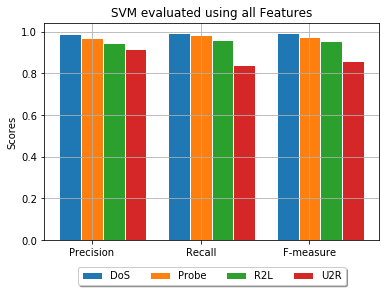

In [272]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.2

# set height of bar

# DoS = [0.99826,0.99665,0.99772]
# Probe  =[0.96907,0.98365, 0.97613]
# R2L  = [0.94854,0.96264,0.95529]
# U2R  = [0.91988,0.83981,0.85918]
DoS = [precision_84_feature_DoS.mean(),recall_84_feature_DoS.mean(),f_84_feature_DoS.mean()]
Probe  =[precision_84_feature_Probe.mean(),recall_84_feature_Probe.mean(),f_84_feature_Probe.mean()]
R2L  = [precision_84_feature_R2L.mean(),recall_84_feature_R2L.mean(),f_84_feature_R2L.mean()]
U2R  = [precision_84_feature_U2R.mean(),recall_84_feature_U2R.mean(),f_84_feature_U2R.mean()]


fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(DoS))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

r4 = [x + barWidth for x in r3]

# Make the plot

rects1=ax.bar(r1, DoS, width=barWidth, edgecolor='white', label='DoS')
rects2=ax.bar(r2, Probe, width=barWidth, edgecolor='white', label='Probe')
rects3=ax.bar(r3, R2L, width=barWidth, edgecolor='white', label='R2L')
rects4=ax.bar(r4, U2R, width=barWidth, edgecolor='white', label='U2R')

ax.set_ylabel('Scores')
ax.set_title('SVM evaluated using all Features')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2 , height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

ax.set_xticks([r + barWidth for r in range(len(DoS))])
ax.set_xticklabels(['Precision', 'Recall','F-measure'])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.grid()
plt.show()

## Train SVM for the Selected Features

In [274]:
clf_SVM_rfe_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_rfe_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_rfe_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_rfe_U2R=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_rfe_DoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_SVM_rfe_Probe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_SVM_rfe_R2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_SVM_rfe_U2R.fit(X_rfeU2R, Y_U2R.astype(int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [275]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

In [276]:
Y_DoS_pred2=clf_SVM_rfe_DoS.predict(X_DoS_test2)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9020,691
1,1852,5608


In [277]:

Y_Probe_pred2=clf_SVM_rfe_Probe.predict(X_Probe_test2)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,2
Actual attacks,,
0,9597,114
2,2023,398


In [278]:
Y_R2L_pred2=clf_SVM_rfe_R2L.predict(X_R2L_test2)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9698,13
3,2882,3


In [279]:
Y_U2R_pred2=clf_SVM_rfe_U2R.predict(X_U2R_test2)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9709,2
4,60,7


## Evaluating the proposed model (SVM) using F-max, Accuary, Percision and Recall  <br>


**DoS**


In [280]:
accuracy_13_feature_DoS = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_13_feature_DoS.mean(), accuracy_13_feature_DoS.std() * 2))

precision_13_feature_DoS = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_13_feature_DoS.mean(), precision_13_feature_DoS.std() * 2))

recall_13_feature_DoS = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_13_feature_DoS.mean(), recall_13_feature_DoS.std() * 2))

f_13_feature_DoS = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_13_feature_DoS: %0.5f (+/- %0.5f)" % (f_13_feature_DoS.mean(), f_13_feature_DoS.std() * 2))

Accuracy: 0.99825 (+/- 0.00173)
Precision: 0.99785 (+/- 0.00214)
Recall: 0.99638 (+/- 0.00340)
F-measure_13_feature_DoS: 0.99711 (+/- 0.00340)


In [227]:
#**Probe**

In [281]:
accuracy_13_feature_Probe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_13_feature_Probe.mean(), accuracy_13_feature_Probe.std() * 2))

precision_13_feature_Probe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_13_feature_Probe.mean(), precision_13_feature_Probe.std() * 2))

recall_13_feature_Probe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_13_feature_Probe.mean(), recall_13_feature_Probe.std() * 2))

f_13_feature_Probe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_13_feature_Probe: %0.5f (+/- %0.5f)" % (f_13_feature_Probe.mean(), f_13_feature_Probe.std() * 2))


Accuracy: 0.99373 (+/- 0.00450)
Precision: 0.99078 (+/- 0.00519)
Recall: 0.98771 (+/- 0.00855)
F-measure_13_feature_Probe: 0.99002 (+/- 0.00738)


In [284]:
accuracy_13_feature_R2L = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_13_feature_R2L.mean(), accuracy_13_feature_R2L.std() * 2))

precision_13_feature_R2L = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_13_feature_R2L.mean(), precision_13_feature_R2L.std() * 2))

recall_13_feature_R2L = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_13_feature_R2L.mean(), recall_13_feature_R2L.std() * 2))

f_13_feature_R2L = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_13_feature_U2R: %0.5f (+/- %0.5f)" % (f_13_feature_R2L.mean(), f_13_feature_R2L.std() * 2))

Accuracy: 0.97459 (+/- 0.00674)
Precision: 0.96848 (+/- 0.01528)
Recall: 0.96066 (+/- 0.01503)
F-measure_13_feature_U2R: 0.96502 (+/- 0.00851)


In [285]:
accuracy_13_feature_U2R = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_13_feature_U2R.mean(), accuracy_13_feature_U2R.std() * 2))

precision_13_feature_U2R = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_13_feature_U2R.mean(), precision_13_feature_U2R.std() * 2))

recall_13_feature_U2R = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_13_feature_U2R.mean(), recall_13_feature_U2R.std() * 2))

f_13_feature_U2R = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_13_feature_U2R: %0.5f (+/- %0.5f)" % (f_13_feature_U2R.mean(), f_13_feature_U2R.std() * 2))

Accuracy: 0.99703 (+/- 0.00266)
Precision: 0.92238 (+/- 0.13472)
Recall: 0.79860 (+/- 0.21430)
F-measure_13_feature_U2R: 0.86346 (+/- 0.11949)


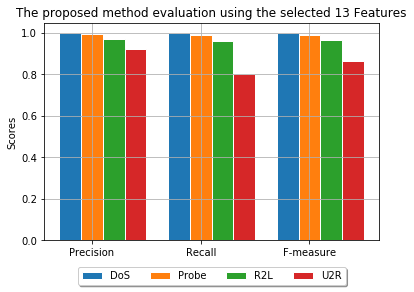

In [286]:

# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.2

# set height of bar
# DoS = [0.99826,0.99665,0.99772]
# Probe  =[0.99094,0.98802, 0.99029]
# R2L  = [ 0.96922, 0.96133, 0.96409]
# U2R  = [0.92197,0.81879,0.86895]
DoS = [precision_13_feature_DoS.mean(),recall_13_feature_DoS.mean(),f_13_feature_DoS.mean()]
Probe  =[precision_13_feature_Probe.mean(),recall_13_feature_Probe.mean(),f_13_feature_Probe.mean()]
R2L  = [precision_13_feature_R2L.mean(),recall_13_feature_R2L.mean(),f_13_feature_R2L.mean()]
U2R  = [precision_13_feature_U2R.mean(),recall_13_feature_U2R.mean(),f_13_feature_U2R.mean()]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(DoS))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

r4 = [x + barWidth for x in r3]

# Make the plot

rects1=ax.bar(r1, DoS, width=barWidth, edgecolor='white', label='DoS')
rects2=ax.bar(r2, Probe, width=barWidth, edgecolor='white', label='Probe')
rects3=ax.bar(r3, R2L, width=barWidth, edgecolor='white', label='R2L')
rects4=ax.bar(r4, U2R, width=barWidth, edgecolor='white', label='U2R')

ax.set_ylabel('Scores')
ax.set_title('The proposed method evaluation using the selected 13 Features')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2 , height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks([r + barWidth for r in range(len(DoS))])
ax.set_xticklabels(['Precision', 'Recall','F-measure'])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')
plt.show()

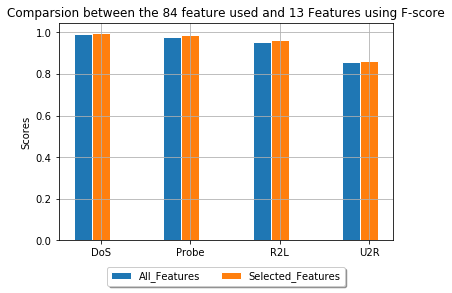

In [287]:

# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.2

# set height of bar

All_Features = [f_84_feature_DoS.mean(),f_84_feature_Probe.mean(),f_84_feature_R2L.mean(),f_84_feature_U2R.mean()]
Selected_Features  =[f_13_feature_DoS.mean(),f_13_feature_Probe.mean(), f_13_feature_R2L.mean(),f_13_feature_U2R.mean()]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(All_Features))

r2 = [x + barWidth for x in r1]


rects1=ax.bar(r1, All_Features, width=barWidth, edgecolor='white', label='All_Features')
rects2=ax.bar(r2, Selected_Features, width=barWidth, edgecolor='white', label='Selected_Features')

ax.set_ylabel('Scores')
ax.set_title('Comparsion between the 84 feature used and 13 Features using F-score')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2 , height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks([r + barWidth for r in range(len(All_Features))])
ax.set_xticklabels(['DoS', 'Probe','R2L','U2R'])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')
plt.show()

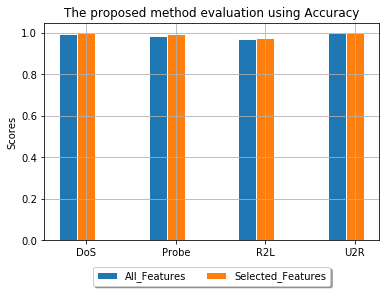

In [288]:

# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.2

# set height of bar

All_Features = [accuracy_84_feature_DoS.mean(),accuracy_84_feature_Probe.mean(),accuracy_84_feature_R2L.mean(),accuracy_84_feature_U2R.mean()]
Selected_Features  =[accuracy_13_feature_DoS.mean(),accuracy_13_feature_Probe.mean(), accuracy_13_feature_R2L.mean(),accuracy_13_feature_U2R.mean()]



fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(All_Features))

r2 = [x + barWidth for x in r1]

# r3 = [x + barWidth for x in r2]

# r4 = [x + barWidth for x in r3]

# Make the plot
# plt.bar(r1, Random_Forest, width=barWidth, edgecolor='white', label='Random_Forest')
# plt.bar(r2, XGBoost, width=barWidth, edgecolor='white', label='XGBoost')
# plt.bar(r3, Decision_Tree, width=barWidth, edgecolor='white', label='Decision_Tree')
rects1=ax.bar(r1, All_Features, width=barWidth, edgecolor='white', label='All_Features')
rects2=ax.bar(r2, Selected_Features, width=barWidth, edgecolor='white', label='Selected_Features')
# rects3=ax.bar(r3, R2L, width=barWidth, edgecolor='white', label='R2L')
# rects4=ax.bar(r4, U2R, width=barWidth, edgecolor='white', label='U2R')
# ax.ylim(0,100)
# ax.set_ylim([0,0.78])
# Add xticks on the middle of the group bars
# plt.xlabel('group')
ax.set_ylabel('Scores')
ax.set_title('The proposed method evaluation using Accuracy')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2 , height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)
# ax.set_xticklabels([r + barWidth for r in range(len(Random_Forest))], ['F1-Score', 'Precision', 'Recall'])
# ax.set_xticklabels(['F1-Score', 'Precision', 'Recall'])
ax.set_xticks([r + barWidth for r in range(len(All_Features))])
ax.set_xticklabels(['DoS', 'Probe','R2L','U2R'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')
plt.show()

## Random Forest
1-In this section you will implement Random Forest algorithm to be your classifer <br>
2-Apply the algorithm on all the features<br>
3-Apply the algorithm on the selected features<br>
4-evalaute and calcaualate **Accuracy** **Percision** **Recall** and **F-score** as discussed earlier <br>

**Hint** <br>
1-Use Random Forest algorithm with scikit-learn [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>

## RandomForestClassifier

In [194]:
# all features
clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [195]:
# selected features
clf_rfeDoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeProbe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeR2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeU2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

**Step 5: Prediction & Evaluation (validation):**


---



Using all Features for each category

Confusion Matrices


---



DoS¶

In [196]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf_DoS.predict(X_DoS_test)


array([1, 0, 0, ..., 0, 0, 0])

In [197]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0.4, 0.6],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.7, 0.3]])

In [198]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)

# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9694,17
1,4785,2675


In [199]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix

pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9587,124
2,1408,1013


In [200]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


In [201]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,66,1


**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99790 (+/- 0.00234)
Precision: 0.99879 (+/- 0.00188)
Recall: 0.99665 (+/- 0.00344)
F-measure: 0.99772 (+/- 0.00192)


**Probe**

In [203]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99662 (+/- 0.00333)
Precision: 0.99669 (+/- 0.00470)
Recall: 0.99293 (+/- 0.00668)
F-measure: 0.99444 (+/- 0.00464)


**U2R**

In [204]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99775 (+/- 0.00153)
Precision: 0.97740 (+/- 0.06663)
Recall: 0.85808 (+/- 0.11861)
F-measure: 0.90762 (+/- 0.12381)


In [205]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.98031 (+/- 0.00614)
Precision: 0.97520 (+/- 0.01225)
Recall: 0.97132 (+/- 0.01234)
F-measure: 0.97133 (+/- 0.00882)
